In [18]:
#%% Import necessary packages and functions
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize 
from scipy.optimize import curve_fit

def find_nearest(array, value):
    #array is a 1D vector of wavelengths
    #value is the specific wavelength for which want the index
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def trim_data(x, data, limit1, limit2):
    #x is a 1D array of two theta or q values
    #data is an array of x-ray intensities
    #limit1 and limit2 are what you'd like to trime your data to 
    test = np.array(x)
    set1 = find_nearest(test,limit1)
    set2 = find_nearest(test,limit2)
    return x[set1:set2], data[set1:set2]

def back_abs(x, data, limit1, limit2):
    #x is a 1D array of wavelengths
    #data is an array of intensities
    #limit1 and limit2 are what you'd like to use for calculating background
    test = np.array(x)
    set1 = find_nearest(test,limit1)
    set2 = find_nearest(test,limit2)
    back = np.mean(data[set1:set2])
    data_correct=(data-back)
    return data_correct, back

def back_abs(x, data, limit1, limit2):
    #x is a 1D array of wavelengths
    #data is an array of intensities
    #limit1 and limit2 are what you'd like to use for calculating background
    test = np.array(x)
    set1 = find_nearest(test,limit1)
    set2 = find_nearest(test,limit2)
    back = np.mean(data[set1:set2])
    data_correct=(data-back)
    return data_correct, back

def Wavelen2eV(wavelen):
    #wavelen: array like, an array of e&m wavelength in nm
    c_light = 2.99792458e8 * 1e9 #
    h_plank = 4.1357e-15 
    eV_tmp=[c_light/each*h_plank for each in wavelen]
    return np.array(eV_tmp)

def linear(x,m,b):
    return m*x + b

def tauc_fit(eV, taucscale, limit1, limit2):
    set1 = find_nearest(eV,limit1)
    set2 = find_nearest(eV,limit2)
    popt, pcov = curve_fit(linear, eV[set1:set2], taucscale[set1:set2])
    return -1*popt[1]/popt[0], popt, pcov



Results Summary
| Chemistry | Bandgap (eV)| Uncertainty (eV)|
| --- | --- | --- |
| 11 | 1.80 | .06 |
| 12 | 1.79 | .07 |
| 13 | 1.73 | .04 |
| 14 | 1.70 | .08 | 
| 15 | 1.84 | .09 | 
| 16 | 1.74 | .07 |
| 17 | 1.77 | .06 |
| 18 | 2.0 | .1|

## Chemistry 11
Bandgap = 1.80 +/- 0.06 eV

Bandgap 1.7992868381472311 eV
Uncertainty Less 0.05979242638622284
Uncertainty More -0.061790048126734165


Text(0, 0.5, 'Tauc Scale')

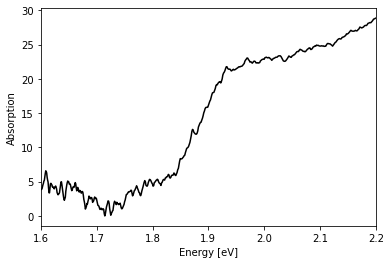

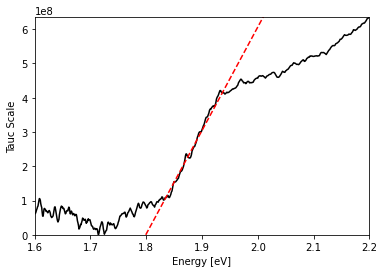

In [29]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem11_Transmission_13-48-09-722.txt' #update for your data

Abs_range = [2.2,1.6] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [1.95, 1.85] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')
ax2.set_ylabel('Tauc Scale')

## Chemistry 12
Bandgap = 1.79 +/- 0.07 eV

Bandgap 1.7860131435791287 eV
Uncertainty Less 0.06809013005416431
Uncertainty More -0.07070634472414916


Text(0.5, 0, 'Energy [eV]')

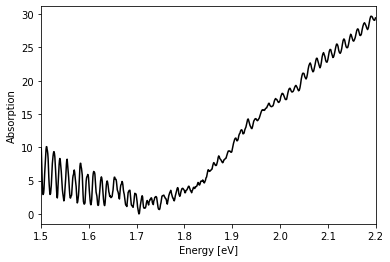

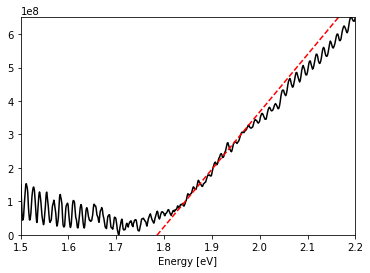

In [34]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem12_Transmission_13-49-18-717.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [1.95, 1.84] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 13
1.73 +/- 0.04 eV

Bandgap 1.7337811966314234 eV
Uncertainty Less 0.03600284024049483
Uncertainty More -0.03675180243556575


Text(0.5, 0, 'Energy [eV]')

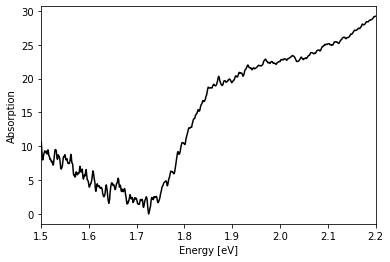

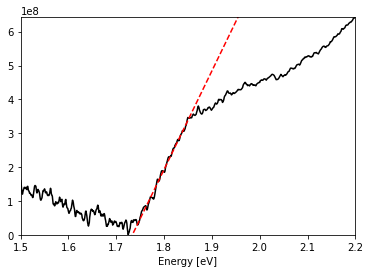

In [79]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem13_Transmission_13-50-14-712.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.6, 1.5] #eV range to for calucating background in eV
Fit_range = [1.85, 1.75] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 14
1.70 +/- 0.08 eV

Bandgap 1.6982085471153119 eV
Uncertainty Less 0.0837357318622971
Uncertainty More -0.08801057806571322


Text(0.5, 0, 'Energy [eV]')

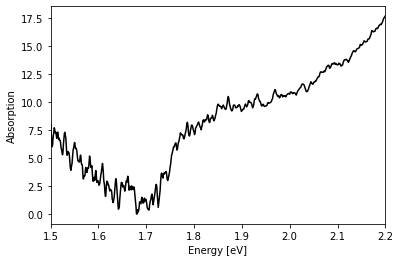

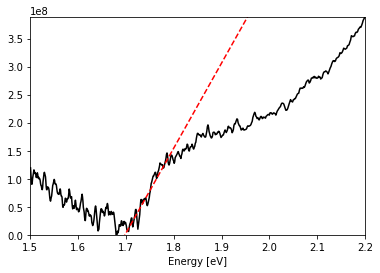

In [80]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem14_Transmission_13-52-16-202.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.6, 1.5] #eV range to for calucating background in eV
Fit_range = [1.8, 1.7] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 15
1.84 +/- 0.09 eV

Bandgap 1.8380554877745274 eV
Uncertainty Less 0.08800822706136491
Uncertainty More -0.0923639323143366


Text(0.5, 0, 'Energy [eV]')

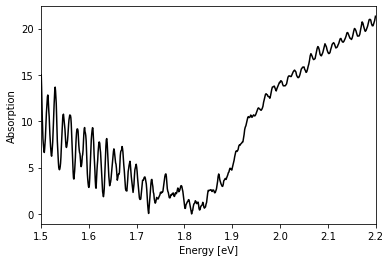

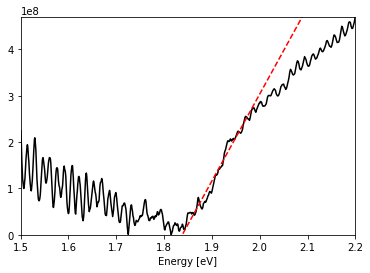

In [49]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem15_Transmission_13-53-12-197.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [1.95, 1.84] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 16
Bandgap = 1.74 +/- 0.07 eV


Bandgap 1.7386076486604594 eV
Uncertainty Less 0.06578835773093283
Uncertainty More -0.06829241788894436


Text(0.5, 0, 'Energy [eV]')

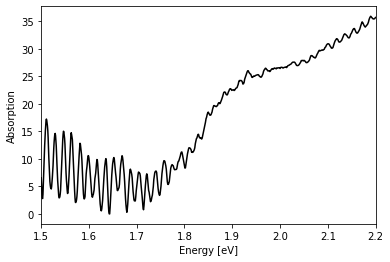

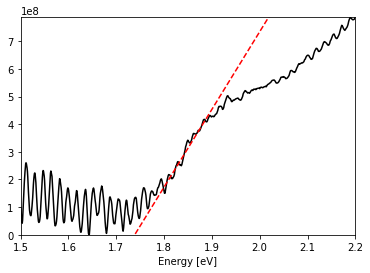

In [51]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem16_Transmission_13-54-15-195.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [1.9, 1.8] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 17
1.77 +/- 0.06 eV

Bandgap 1.770241822580715 eV
Uncertainty Less 0.05976200230245832
Uncertainty More -0.06178853959315034


Text(0.5, 0, 'Energy [eV]')

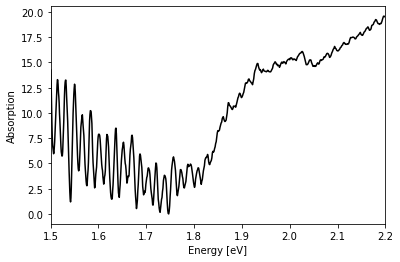

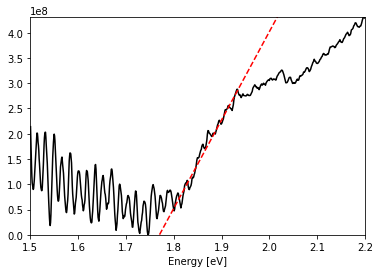

In [54]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem17_Transmission_13-55-23-186.txt' #update for your data

Abs_range = [2.2,1.5] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [1.94, 1.81] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

## Chemistry 18
2.0 +/- 0.1 eV

Bandgap 1.98678539162802 eV
Uncertainty Less 0.13726504488264246
Uncertainty More -0.1472813621986373


Text(0.5, 0, 'Energy [eV]')

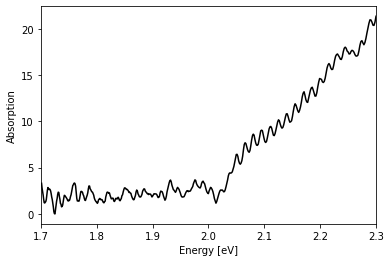

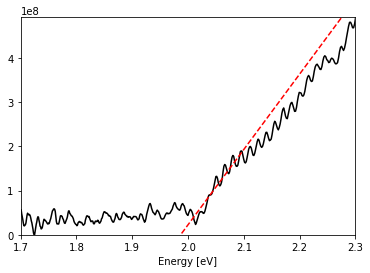

In [61]:
#%%     Update values for importing and analysis
path = r'ABS' #update for your directory
file_name = '/chem18_Transmission_13-56-28-680.txt' #update for your data

Abs_range = [2.3,1.7] #eV range to consider in 
Back_range = [1.7, 1.5] #eV range to for calucating background in eV
Fit_range = [2.1, 2] #eV range to do linear fitting of band edge

Thickness = 200*10**-9 #Approximate thickness of sample
Transition_Power = 1/2 #1/2 for direct, 2 for indirect, 3/2 for forbidden etc.

#   Process Data
transmission = pd.read_csv(path+file_name, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
#correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts

fig1, ax1 = plt.subplots()
ax1.plot(absorption[0],absorption[1], 'k-', label ='data')
#ax1.set_ylim(0,np.max(tauc_scale[1]))
ax1.set_xlim(Abs_range[1],Abs_range[0])
ax1.set_xlabel('Energy [eV]')
ax1.set_ylabel('Absorption')


#   Transfrom Data 
tauc_scale = [absorption[0], (absorption[0]*absorption[1]/Thickness)**1/Transition_Power]
E_g, fit, pcov = tauc_fit(tauc_scale[0],tauc_scale[1],Fit_range[0], Fit_range[1])
print('Bandgap', E_g, 'eV')
print('Uncertainty Less', E_g-(-1)*(fit[1]+np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]+fit[0]))
print('Uncertainty More', E_g+(-1)*(fit[1]-np.sqrt(np.diag(pcov))[1])/(np.sqrt(np.diag(pcov))[0]-fit[0]))
#   Plot fit
fig2, ax2 = plt.subplots()
ax2.plot(tauc_scale[0],tauc_scale[1], 'k-', label ='data')
ax2.plot(tauc_scale[0],linear(tauc_scale[0], fit[0], fit[1]), 'r--', label = 'fit')
#ax2.axhline(y=correction[1], color='b', linestyle='--')
ax2.set_ylim(0,np.max(tauc_scale[1]))
ax2.set_xlim(Abs_range[1],Abs_range[0])
ax2.set_xlabel('Energy [eV]')

# Cummulative Figure

['ABS/chem11_Transmission_13-48-09-722.txt', 'ABS/chem12_Transmission_13-49-18-717.txt', 'ABS/chem13_Transmission_13-50-14-712.txt', 'ABS/chem14_Transmission_13-52-16-202.txt', 'ABS/chem15_Transmission_13-53-12-197.txt', 'ABS/chem16_Transmission_13-54-15-195.txt', 'ABS/chem17_Transmission_13-55-23-186.txt', 'ABS/chem18_Transmission_13-56-28-680.txt']


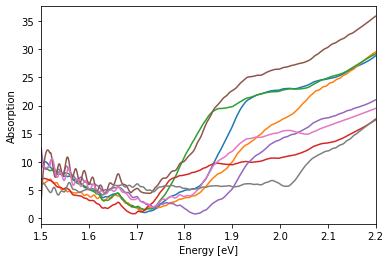

In [78]:
from scipy import signal


path = r'ABS' # use your path
all_files = sorted(glob.glob(path + "/*.txt"))
all_files = all_files[1:]
fig1, ax1 = plt.subplots()
for each in all_files:
    Abs_range = [2.2,1.5] #eV range to consider in 
    Back_range = [1.7, 1.5] #eV range to for calucating background in eV


    #   Process Data
    transmission = pd.read_csv(each, delimiter = '\t', names =['Wavelength', 'Transmission'], skiprows=13) #read in data from ocean optics file
    transmission = trim_data(Wavelen2eV(transmission['Wavelength']), transmission['Transmission'], Abs_range[0], Abs_range[1]) #trim data
    #correction = back_abs(transmission[0],(100-transmission[1])/100, Back_range[0], Back_range[1])
    absorption = [transmission[0], (100-transmission[1])-np.min(100-transmission[1])] #Make new absorption file that is fraction of absoption vs. eV with background subtracts


    ax1.plot(absorption[0],signal.savgol_filter(absorption[1],51,3), label ='data')
    #ax1.set_ylim(0,np.max(tauc_scale[1]))
    ax1.set_xlim(Abs_range[1],Abs_range[0])
    ax1.set_xlabel('Energy [eV]')
    ax1.set_ylabel('Absorption')

print(all_files)